#  BUILD A MODEL TO PREDICT PERFORMANCE OF EMPLOYEES,BASED ON THE VISUALISATION AND ANALYSIS OF PAST DATA OF EMPLOYEES PERFORMANCE.

# 1. Importing Necessary Modules

In [143]:
# Import pandas library for data manipulation and analysis
import pandas as pd 
# Import numpy for numerical operations
import numpy as np
# Import matplotlib's pyplot for creating visualizations
import matplotlib.pyplot as plt
# Import seaborn for statistical data visualization
import seaborn as sns 
# Suppress warning messages to keep output clean
import warnings
warnings.filterwarnings("ignore")


In [144]:
# Read the 'Leads.csv' file into a pandas DataFrame named 'data'
data=pd.read_csv('Test_data.csv')

# Exploratory Data Analysis 

## 1. Data Preprocessing

### (A) Data Understading

In [148]:
# check first 5 rows 
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [152]:
# Get the dimensions of the 'data' DataFrame or array
# Returns a tuple representing (rows, columns)
data.shape

(23490, 13)

In [153]:
# Get the total number of elements in the 'data' array/DataFrame
# This returns the product of the lengths of all axes (rows × columns)
data.size

305370

In [155]:
# Display concise summary of the DataFrame 'data'
# Shows information about index dtype and column dtypes, non-null values and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [158]:
# Generate descriptive statistics for the DataFrame
# This includes count, mean, std, min, 25%, 50%, 75%, max for numeric columns
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [159]:
# Check the data types of each column in the DataFrame
# This helps understand what kind of data we're working with (numeric, categorical, etc.)
data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object

In [162]:
# Display all column names in the DataFrame 'data'
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [164]:
# Calculate the percentage of missing values in each column
# 1. data.isna() creates a boolean mask where True indicates missing values
# 2. .mean() calculates the proportion of missing values (True values) in each column
# 3. Multiply by 100 to convert to percentage
data.isna().mean()*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.401873
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.713921
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
dtype: float64


- Most columns have 0% missing values, meaning they are complete
- The "education" column has approximately 4.40% missing values
- The "previous_year_rating" column has approximately 7.71% missing values


In [167]:
# Count the number of duplicate rows in the dataframe
# Returns the sum of True values (where rows are duplicates)
data.duplicated().sum()

0

# (B) Fixed Rows and Columns 

In [170]:
# Remove the 'employee_id' column from the dataframe as it's not needed for analysis
# axis=1 specifies we're dropping a column (not a row)
# inplace=True means the operation modifies the original dataframe instead of returning a copy
data.drop('employee_id',axis=1,inplace=True)

In [172]:
# Convert all column names to title case (first letter of each word capitalized)
data.columns = data.columns.str.title()

# (C) Handling Missing Values and Drop Duplicates

In [175]:
# Calculate the percentage of missing values for each column
# 1. data.isna() creates a boolean mask where True indicates missing values
# 2. .mean() calculates the proportion of missing values (True = 1, False = 0)
# 3. Multiply by 100 to convert to percentage
data.isna().mean()*100

Department              0.000000
Region                  0.000000
Education               4.401873
Gender                  0.000000
Recruitment_Channel     0.000000
No_Of_Trainings         0.000000
Age                     0.000000
Previous_Year_Rating    7.713921
Length_Of_Service       0.000000
Kpis_Met >80%           0.000000
Awards_Won?             0.000000
Avg_Training_Score      0.000000
dtype: float64


The selected code `data.isna().mean()*100` produced the output you've shared, which shows the percentage of missing values in each column of your DataFrame. 

The results indicate that most columns have no missing values (0.000000%), but two columns do have missing data:
- Education: 4.401873% missing values
- Previous_Year_Rating: 7.713921% missing values

This information is valuable for data preprocessing as it helps you identify which columns need to be handled for missing values before proceeding with analysis or modeling.

In [178]:
# Count the frequency of each unique value in the 'Education' column
# This shows how many records exist for each education level in the dataset
data['Education'].value_counts()

Education
Bachelor's          15578
Master's & above     6504
Below Secondary       374
Name: count, dtype: int64

In [180]:
# Count the frequency of each unique value in the 'Previous_Year_Rating' column
# This helps understand the distribution of employee ratings from the previous year
data['Previous_Year_Rating'].value_counts()

Previous_Year_Rating
3.0    7921
5.0    5097
4.0    4249
1.0    2680
2.0    1731
Name: count, dtype: int64

In [182]:
# Fill missing values in the 'Education' column with the most frequent value (mode)
# inplace=True modifies the original dataframe without creating a new one
data['Education'].fillna(data['Education'].mode()[0],inplace=True)

In [184]:
# Fill missing values in 'Previous_Year_Rating' column with the median value
# This is a common approach for handling missing numerical data while minimizing the impact of outliers
data['Previous_Year_Rating'].fillna(data['Previous_Year_Rating'].median(),inplace=True)

In [186]:
data['Previous_Year_Rating'] = data['Previous_Year_Rating'].astype(int)

In [188]:
# Calculate the total number of missing values in the entire dataset
# First data.isna() creates a boolean mask of missing values
# Then .sum() counts missing values in each column
# The second .sum() adds up all column totals for a grand total
data.isna().sum().sum()

0

In [190]:
# Count the number of duplicate rows in the dataframe
# Returns the sum of True values (where rows are duplicates)
data.duplicated().sum()

38

In [192]:
# Remove duplicate rows from the dataframe to ensure data quality
data=data.drop_duplicates()

In [194]:
# Count the number of duplicate rows in the dataframe
# Returns the sum of True values (where rows are duplicates)
data.duplicated().sum()

0

# (E) Checking Outliers and Reset Index

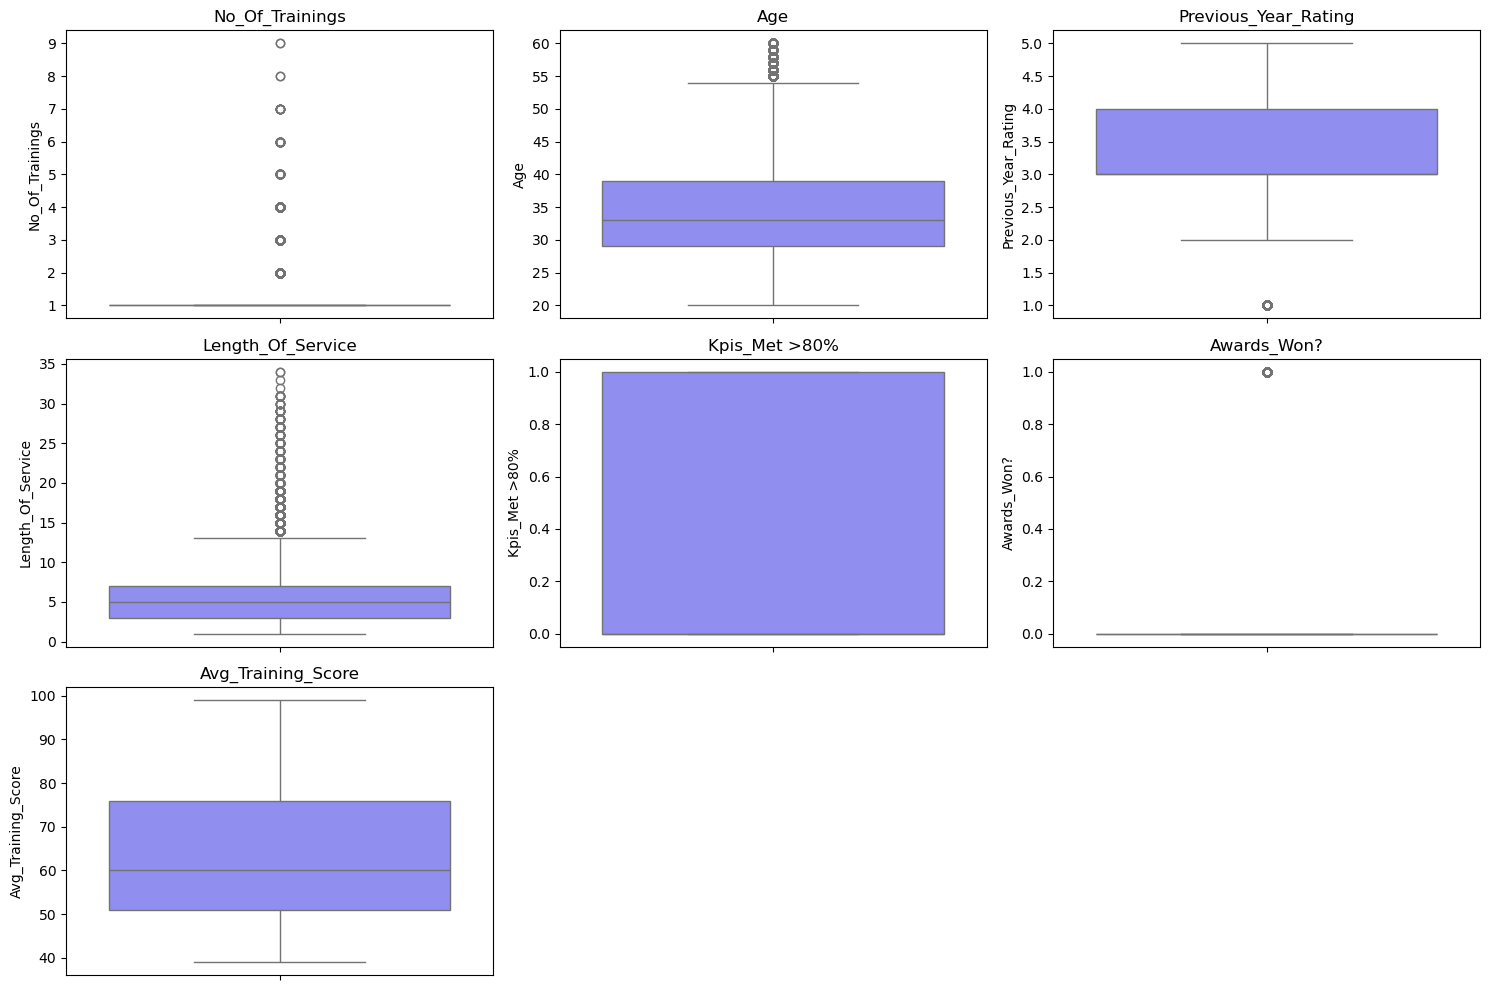

In [274]:
# Boxplot for all integer columns, one at a time
int_cols = data.select_dtypes(int).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(int_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[col],palette='cool')
    plt.title(col)
    plt.tight_layout()



 ### Insights from Numerical Features (Boxplot Analysis)
#### No. of Trainings

- Most employees undergo 1 to 2 training sessions, with a median close to 1.

- There are a few outliers with employees receiving 7+ trainings, possibly indicating special programs or performance issues.

#### Age

- The majority of employees fall in the 30–40 age range.

- The distribution is slightly right-skewed with a few employees older than 50, possibly in managerial positions.

#### Previous Year Rating

- Ratings are mostly centered between 3 and 4, showing that most employees received moderate to high ratings.

- A few low-rated (0–2) outliers exist, indicating potential performance concerns.

#### Length of Service

- Most employees have a service length between 2 and 7 years.

- Several outliers suggest some employees have been with the company for over 15+ years, indicating loyalty or senior roles.

#### KPI Met >80%

- This is a binary feature (0 or 1).

- The boxplot confirms a large portion of employees met their KPIs (value = 1), indicating overall performance consistency.

#### Awards Won?

- Another binary feature with very few employees having won awards.

- This suggests that awards are rare and possibly tied to top performance tiers.

#### Average Training Score

- Scores are mostly between 50 and 75, with a median around 60.

- There are no extreme outliers, showing a fairly tight distribution of training scores across employees.

----

In [200]:
# reset index because i have remove duplicates 
data.reset_index(drop=True,inplace=True)

## Unique value check

In [203]:
# check the unique values in each column by using nunique() method 
for col in data.columns:
    print(f"{col}: {data[col].nunique()} unique values")


Department: 9 unique values
Region: 34 unique values
Education: 3 unique values
Gender: 2 unique values
Recruitment_Channel: 3 unique values
No_Of_Trainings: 9 unique values
Age: 41 unique values
Previous_Year_Rating: 5 unique values
Length_Of_Service: 34 unique values
Kpis_Met >80%: 2 unique values
Awards_Won?: 2 unique values
Avg_Training_Score: 61 unique values


# 2. Data Visualization

# (A) Univariate Analysis

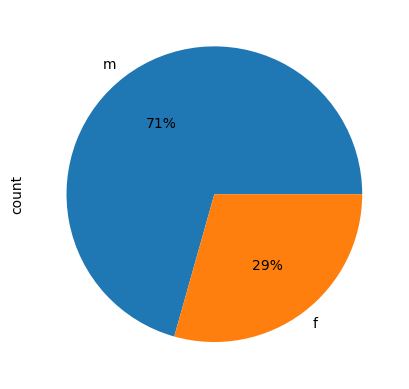

In [207]:
# Calculate the count of each value in the 'Gender' column
# Plot a pie chart showing the distribution of m vs f
# autopct='%.f%%' displays whole number percentages on the chart
data.Gender.value_counts().plot.pie(autopct='%.f%%');

In [ ]:
# in department sales and marketing count is more 
# in region region_2 is highest
# in edu bachlers is high
# in rec_challen other is high


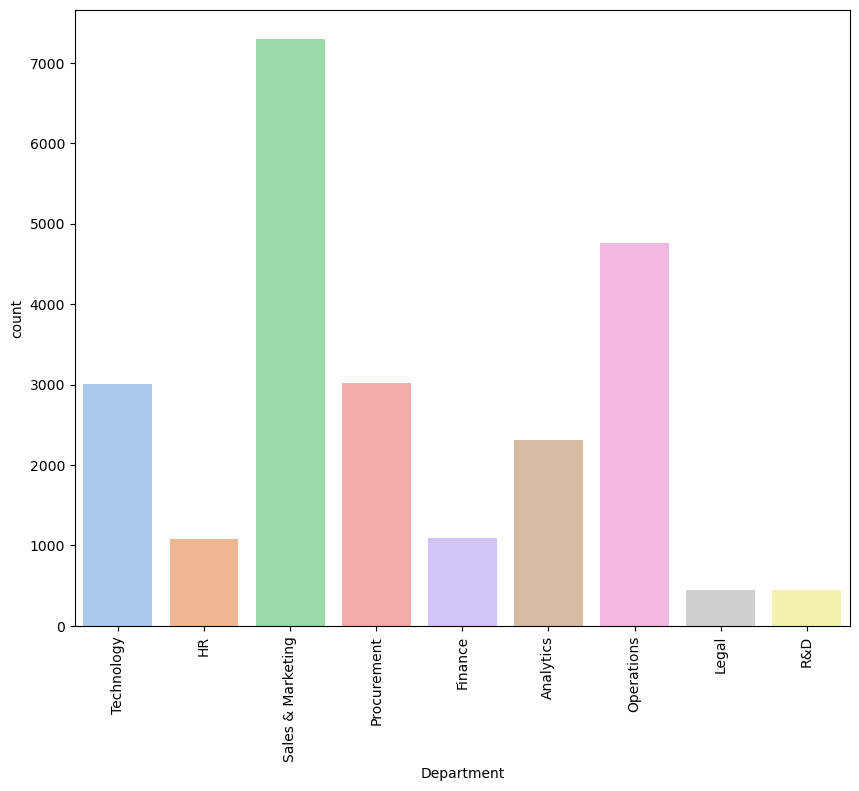

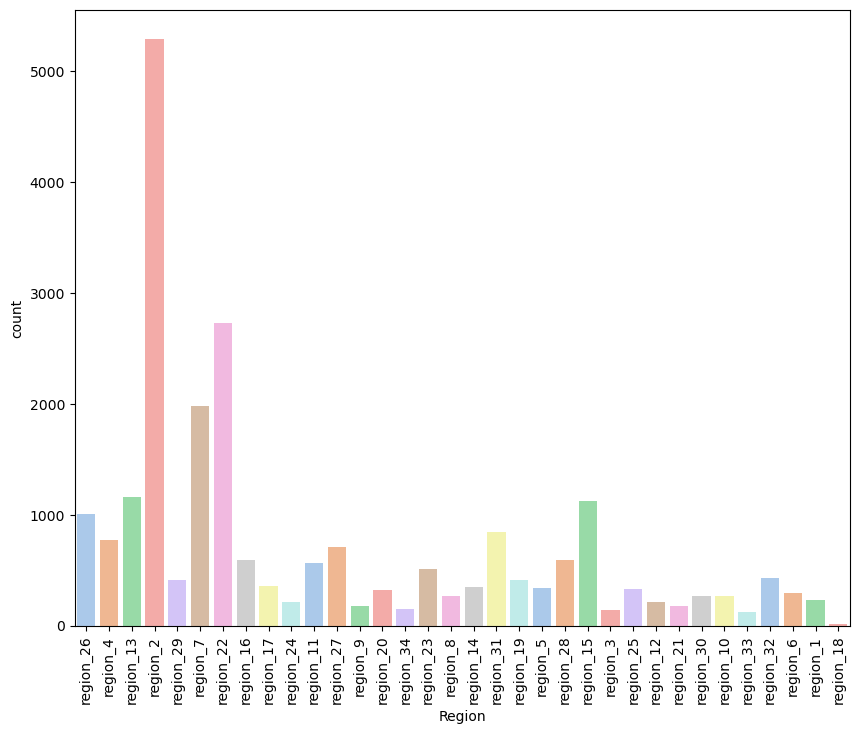

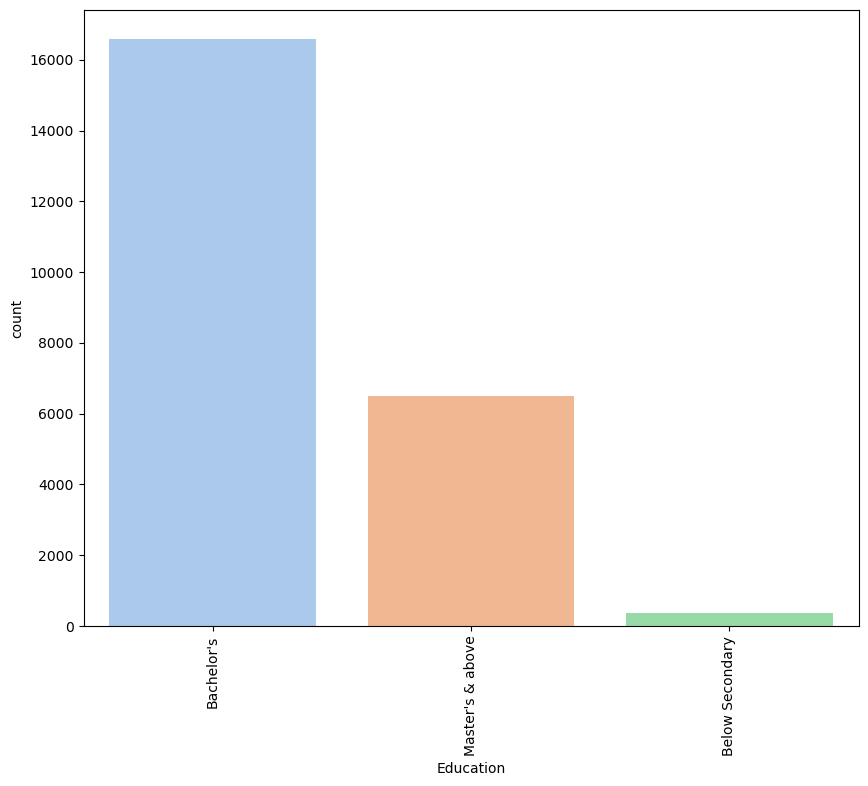

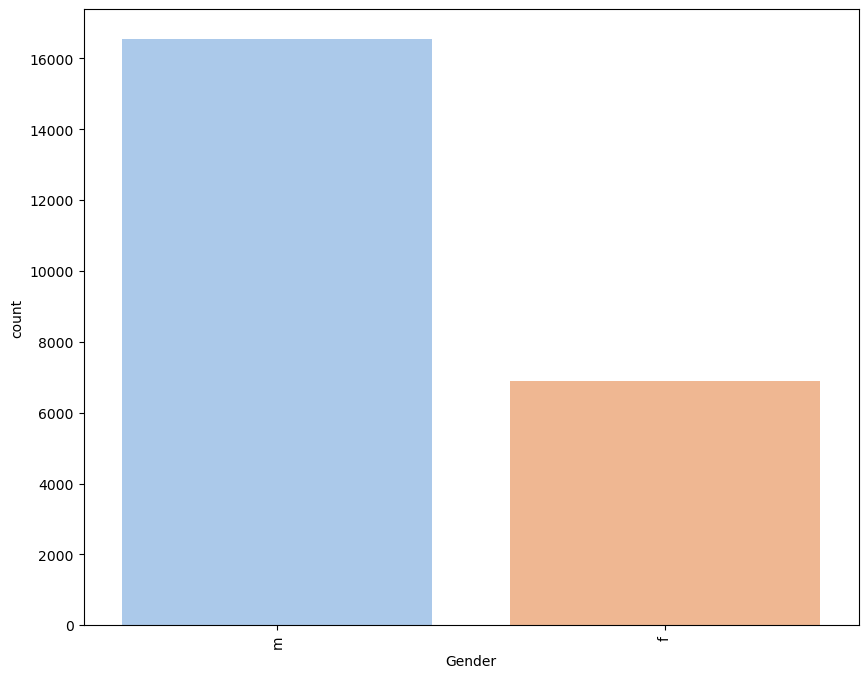

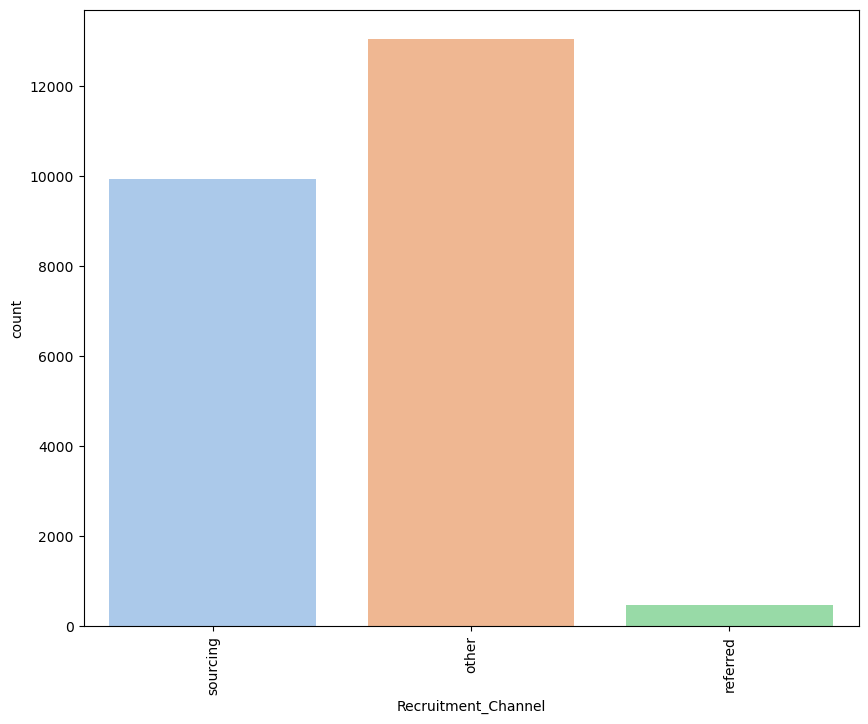

In [223]:
# plot countpot of all object columns 
for i in data.select_dtypes(object):
    plt.figure(figsize=(10,8))
    sns.countplot(x=data[i],palette='pastel')
    plt.xticks(rotation=90)
    plt.show()

## Countplot Insights – Categorical Columns

### 🔹 Department
- The workforce is distributed across multiple departments.
- **Sales & Marketing** and **Operations** have the highest employee counts.
- Departments like **Technology** and **Procurement** are mid-sized.
- **Legal**, **R&D**, and similar departments have very few employees.
- → This shows the company is largely driven by sales and operations.

### 🔹 Region
- Regions such as **Region_2**, **Region_22**, and **Region_7** have the highest representation.
- Several regions have very few employees, indicating smaller offices or recent expansions.
- → Region-wise employee concentration can help guide regional strategies.

### 🔹 Education
- Majority of employees have a **Bachelor’s degree**.
- A significant number hold **Master’s & above** qualifications.
- Very few employees are from a **Below Secondary** education background.
- → The company workforce is highly educated.

### 🔹 Gender
- The majority of employees are labeled **"E"** (likely Male), with fewer labeled **"f"** (Female).
- → Indicates a possible **gender imbalance** that could be further analyzed for diversity and inclusion improvements.


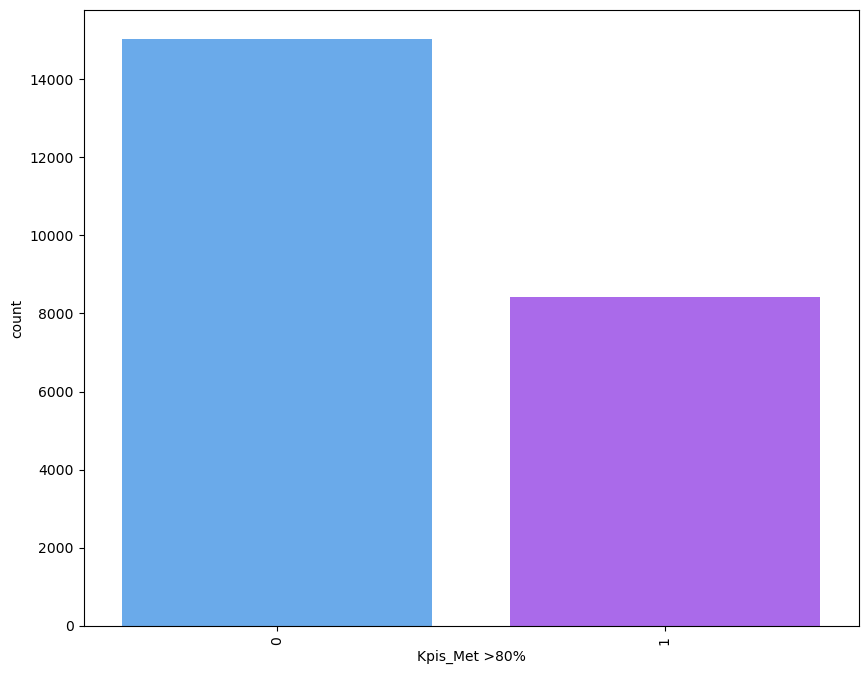

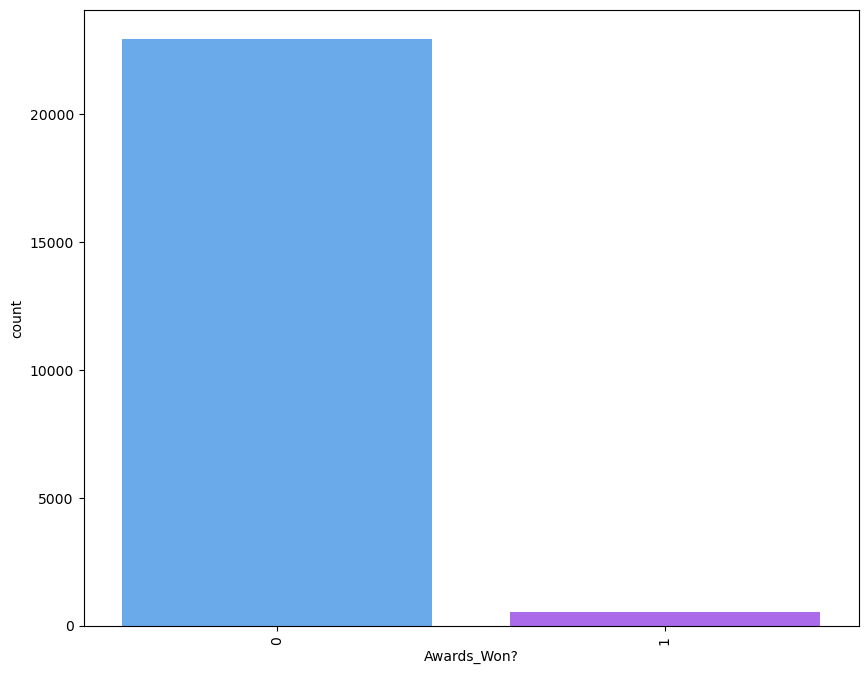

In [233]:
# using count plot for binary colums 'Kpis_Met >80%', 'Awards_Won?'
for i in data[['Kpis_Met >80%', 'Awards_Won?']]:
    plt.figure(figsize=(10,8))
    sns.countplot(x=data[i],palette='cool')
    plt.xticks(rotation=90)
    plt.show()

##  Countplot Insights – Binary Columns

### 🔹 KPIs Met >80%
- A large number of employees **did meet their KPIs** (value = 1).
- A smaller but significant group **did not meet the KPI target** (value = 0).
- → This suggests that while a majority are meeting performance expectations, there’s still room for improvement in employee output or goal setting.

### 🔹 Awards Won?
- Most employees **have not won awards** (value = 0).
- Only a very small fraction **has received awards** (value = 1).
- → This indicates that awards are likely reserved for top-tier performers or are highly competitive.


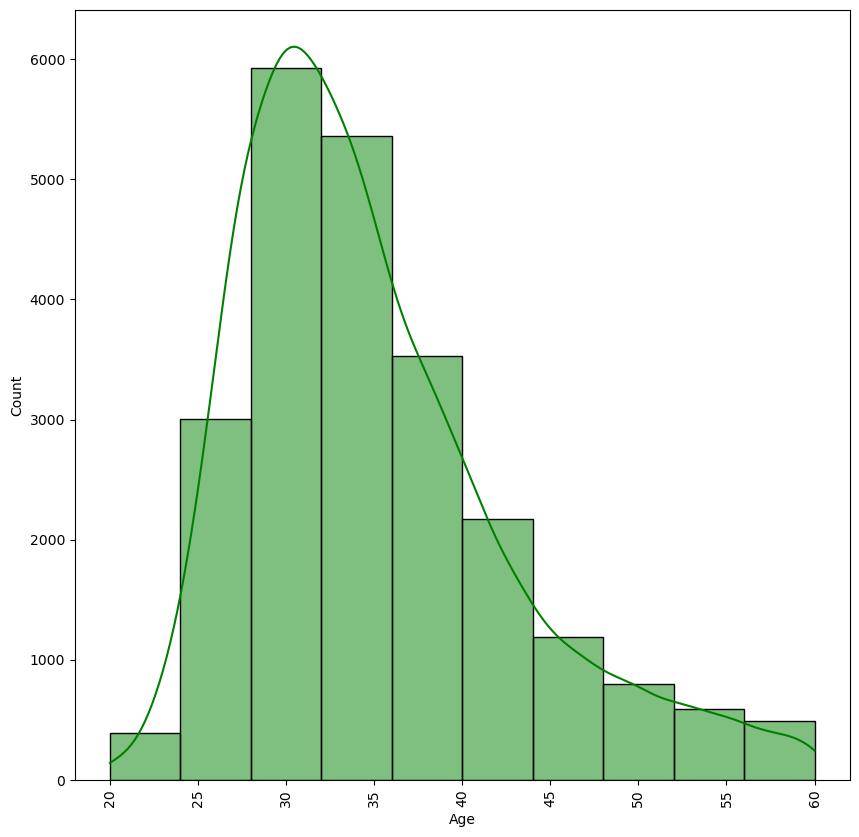

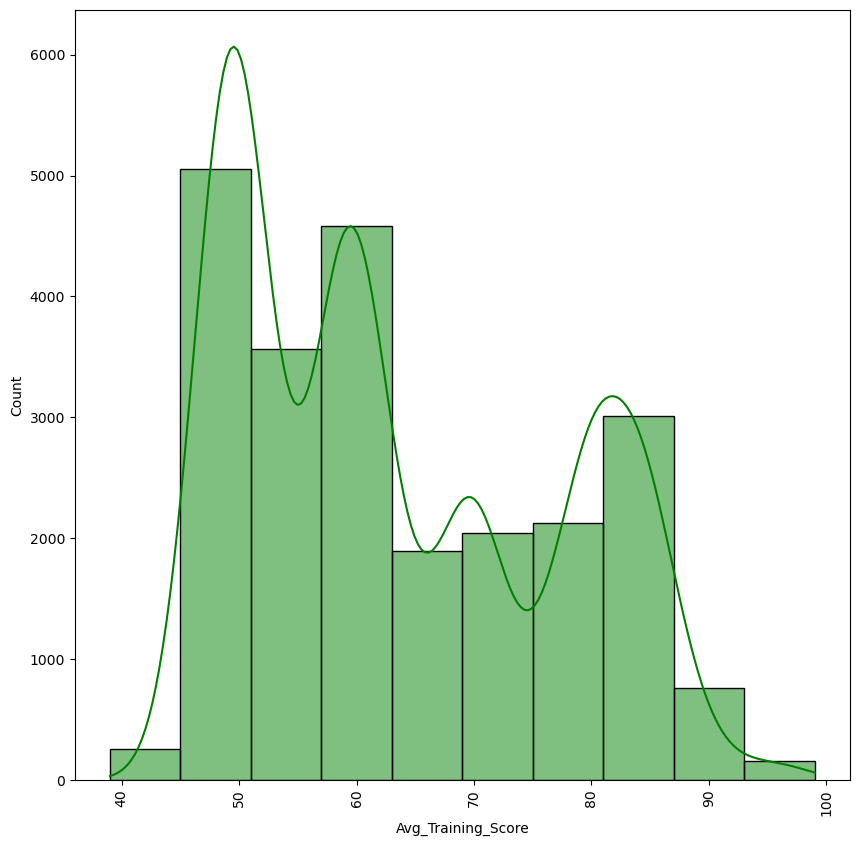

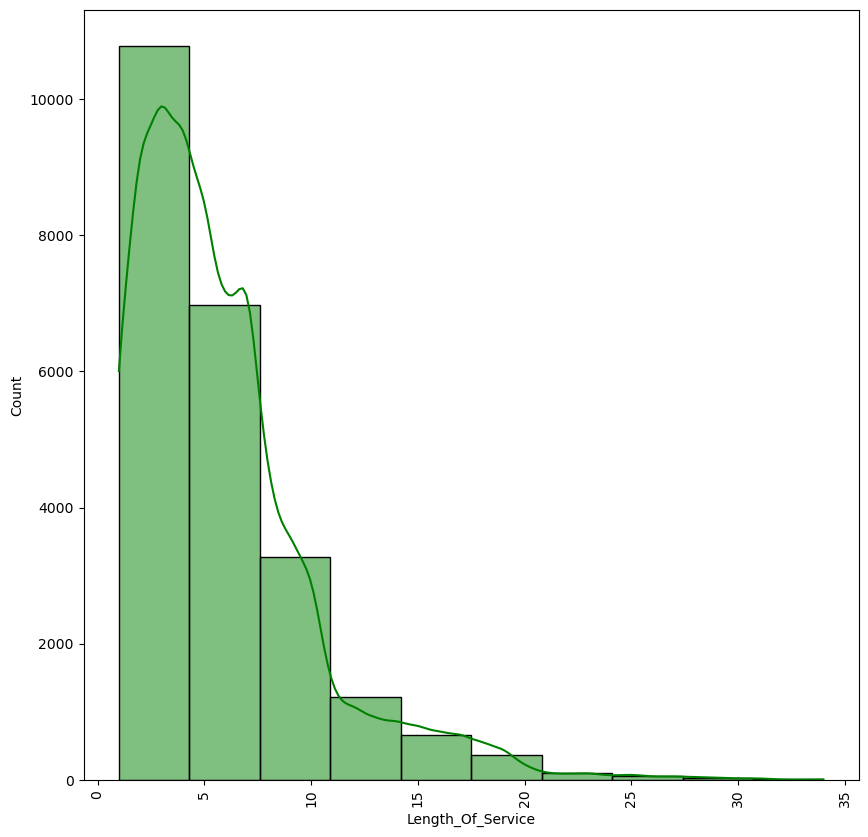

In [250]:
# using histogram check the distrubtion of 'Age','Avg_Training_Score','Length_Of_Service' columns 
for i in data[['Age','Avg_Training_Score','Length_Of_Service']]:
    plt.figure(figsize=(10,10))
    sns.histplot(x=data[i],color='g',kde=True,bins=10,)
    plt.xticks(rotation=90)
    plt.show()

## 📊 Histogram Insights – Distribution of Numerical Features

### 🧓 Age
- Most employees fall within the **25 to 40 age group**.
- The distribution is slightly **right-skewed**, indicating fewer older employees.
- → The workforce is predominantly young to mid-career professionals.

### 📈 Avg_Training_Score
- The average training scores mostly range between **50 and 80**.
- There are multiple **peaks** in the distribution, suggesting varying training performance clusters.
- → May imply different training programs or performance tiers.

### 🧮 Length Of Service
- The majority of employees have **less than 10 years of service**.
- A few employees have more than **20+ years**, but those are very rare.
- → Indicates a relatively **new and dynamic workforce**, with fewer long-tenured employees.


# (B) Bivariate Analysis

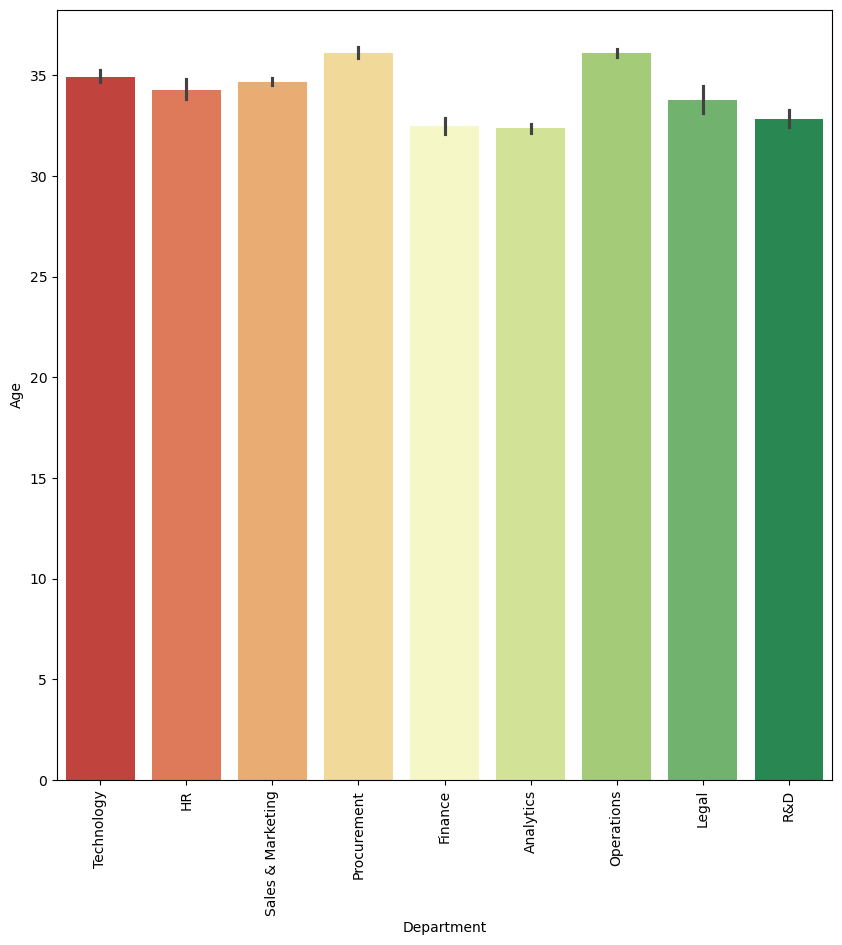

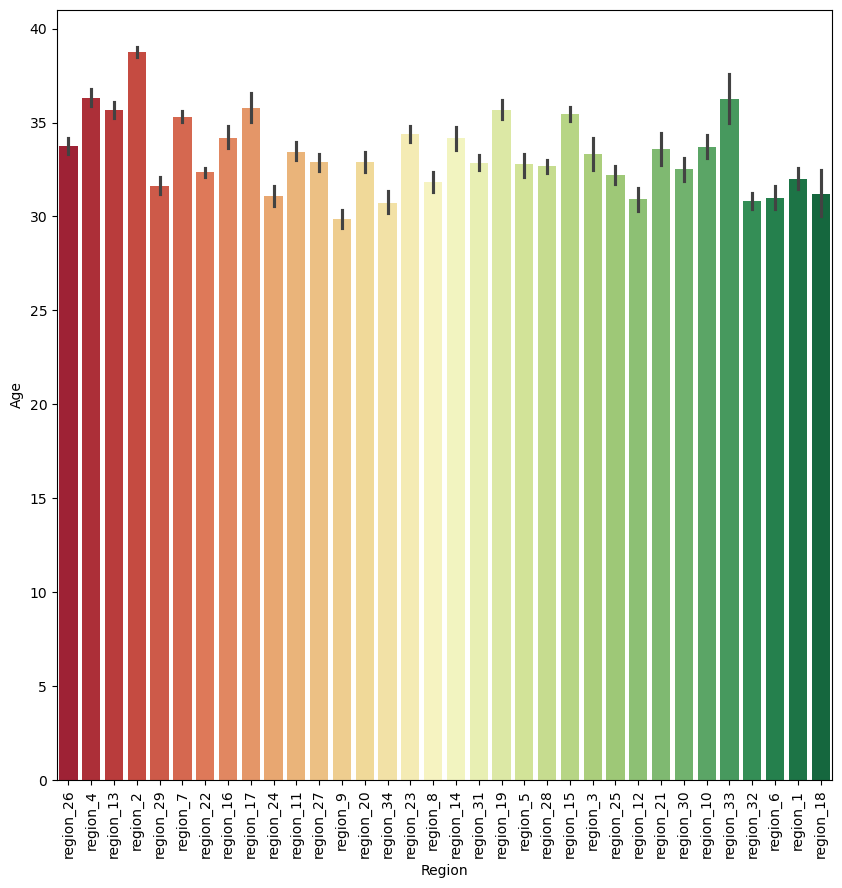

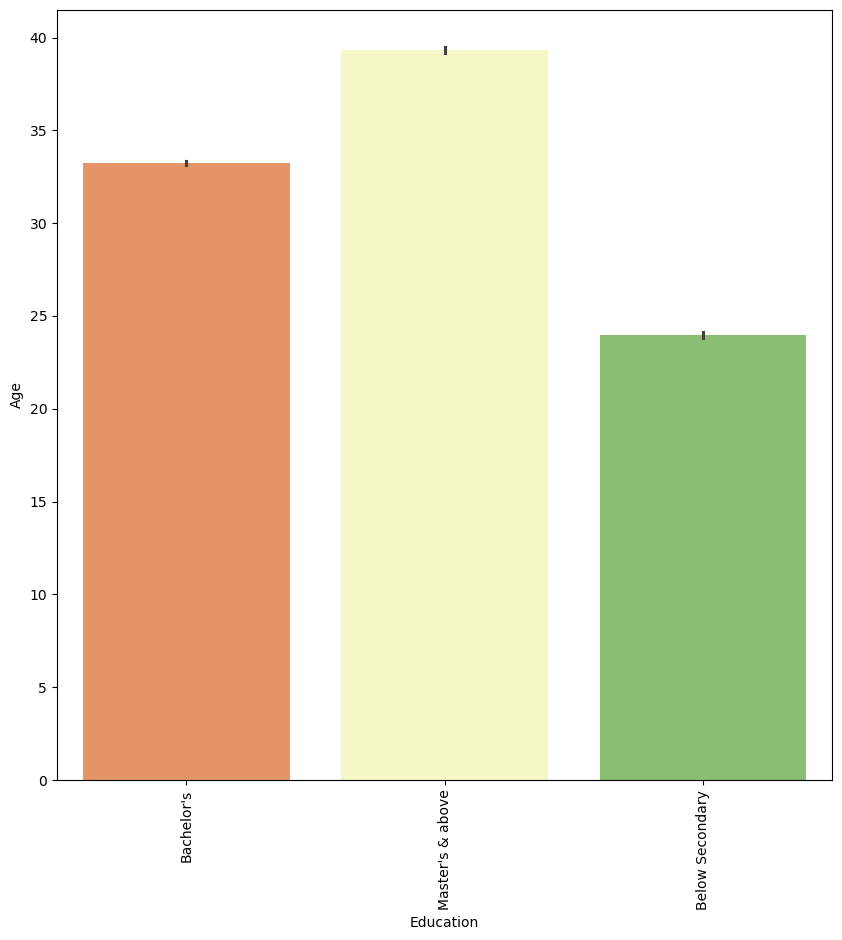

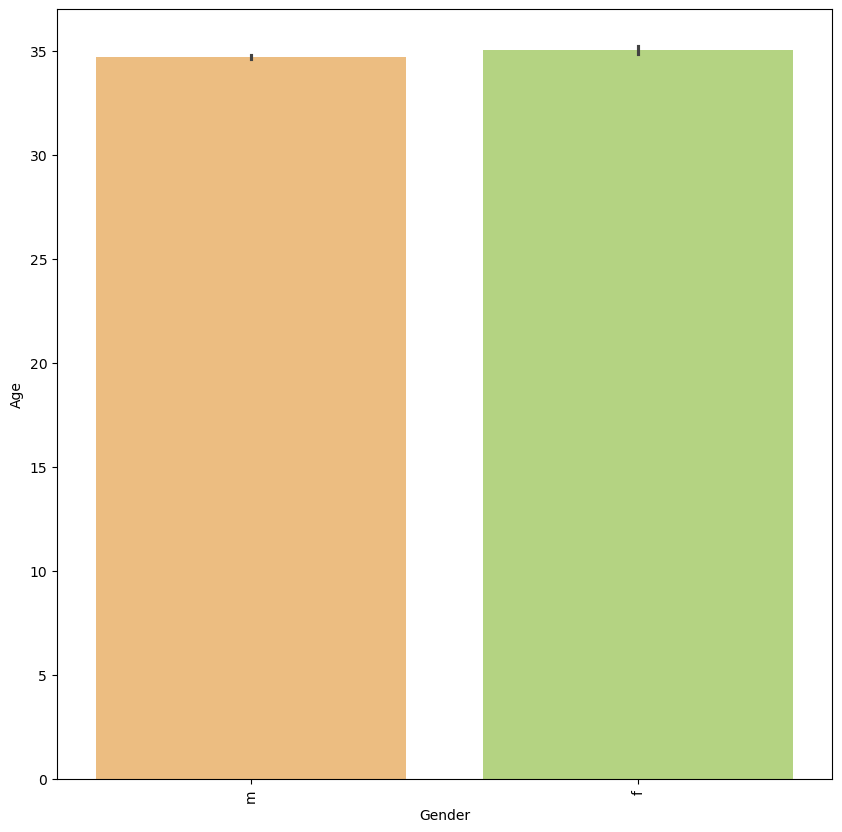

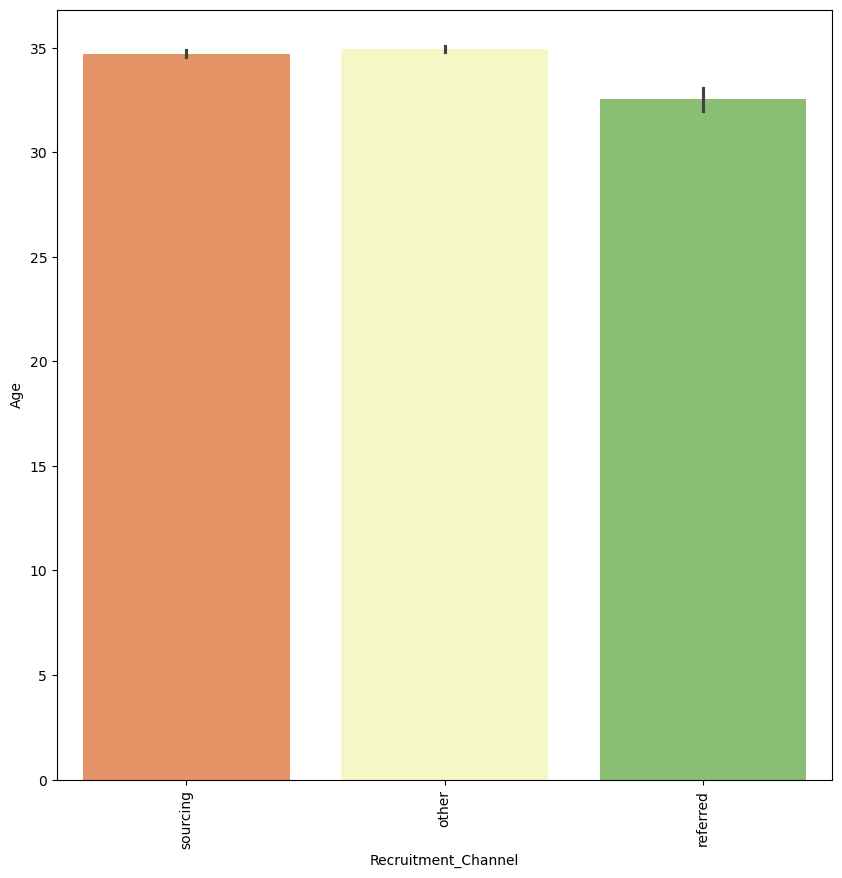

In [253]:
# using barplot for Age vs object columns 
for i in data.select_dtypes(object):
    plt.figure(figsize=(10,10))
    sns.barplot(x=data[i],y='Age',data=data,palette='RdYlGn')
    plt.xticks(rotation=90)
    plt.show()

### 📊 Insights: Age Distribution Across Categories

#### 🎓 By Education:
- Employees with **Below Secondary** education tend to be slightly **older on average**.
- Those with **Bachelor’s** degrees have a **moderate average age**, while **Master’s & above** skew slightly **younger**.

#### ⚧️ By Gender:
- The average **age distribution is similar across genders**, but slight differences may exist due to demographic representation.
- Both genders appear to be mostly in the **mid-to-late 30s**.

#### 🛠️ By Recruitment Channel:
- Employees recruited via **referral** tend to be **older**, possibly indicating referrals are for **experienced professionals**.
- The **sourcing** channel has a slightly **younger average age**, indicating potential focus on freshers or early-career talent.

#### 🏢 By Department:
- Departments such as **Technology** and **HR** have a **younger average age**.
- **Legal** and **R&D** departments have **older average employees**, potentially due to required experience or niche expertise.

#### 🌍 By Region:
- Regions like **region_1, region_6, and region_18** have **higher average age** than others.
- **Region_26 and region_4** are among the **younger regions**, potentially indicating newer workforce or early-career hiring focus.


# (C) Mulitvariate Analysis

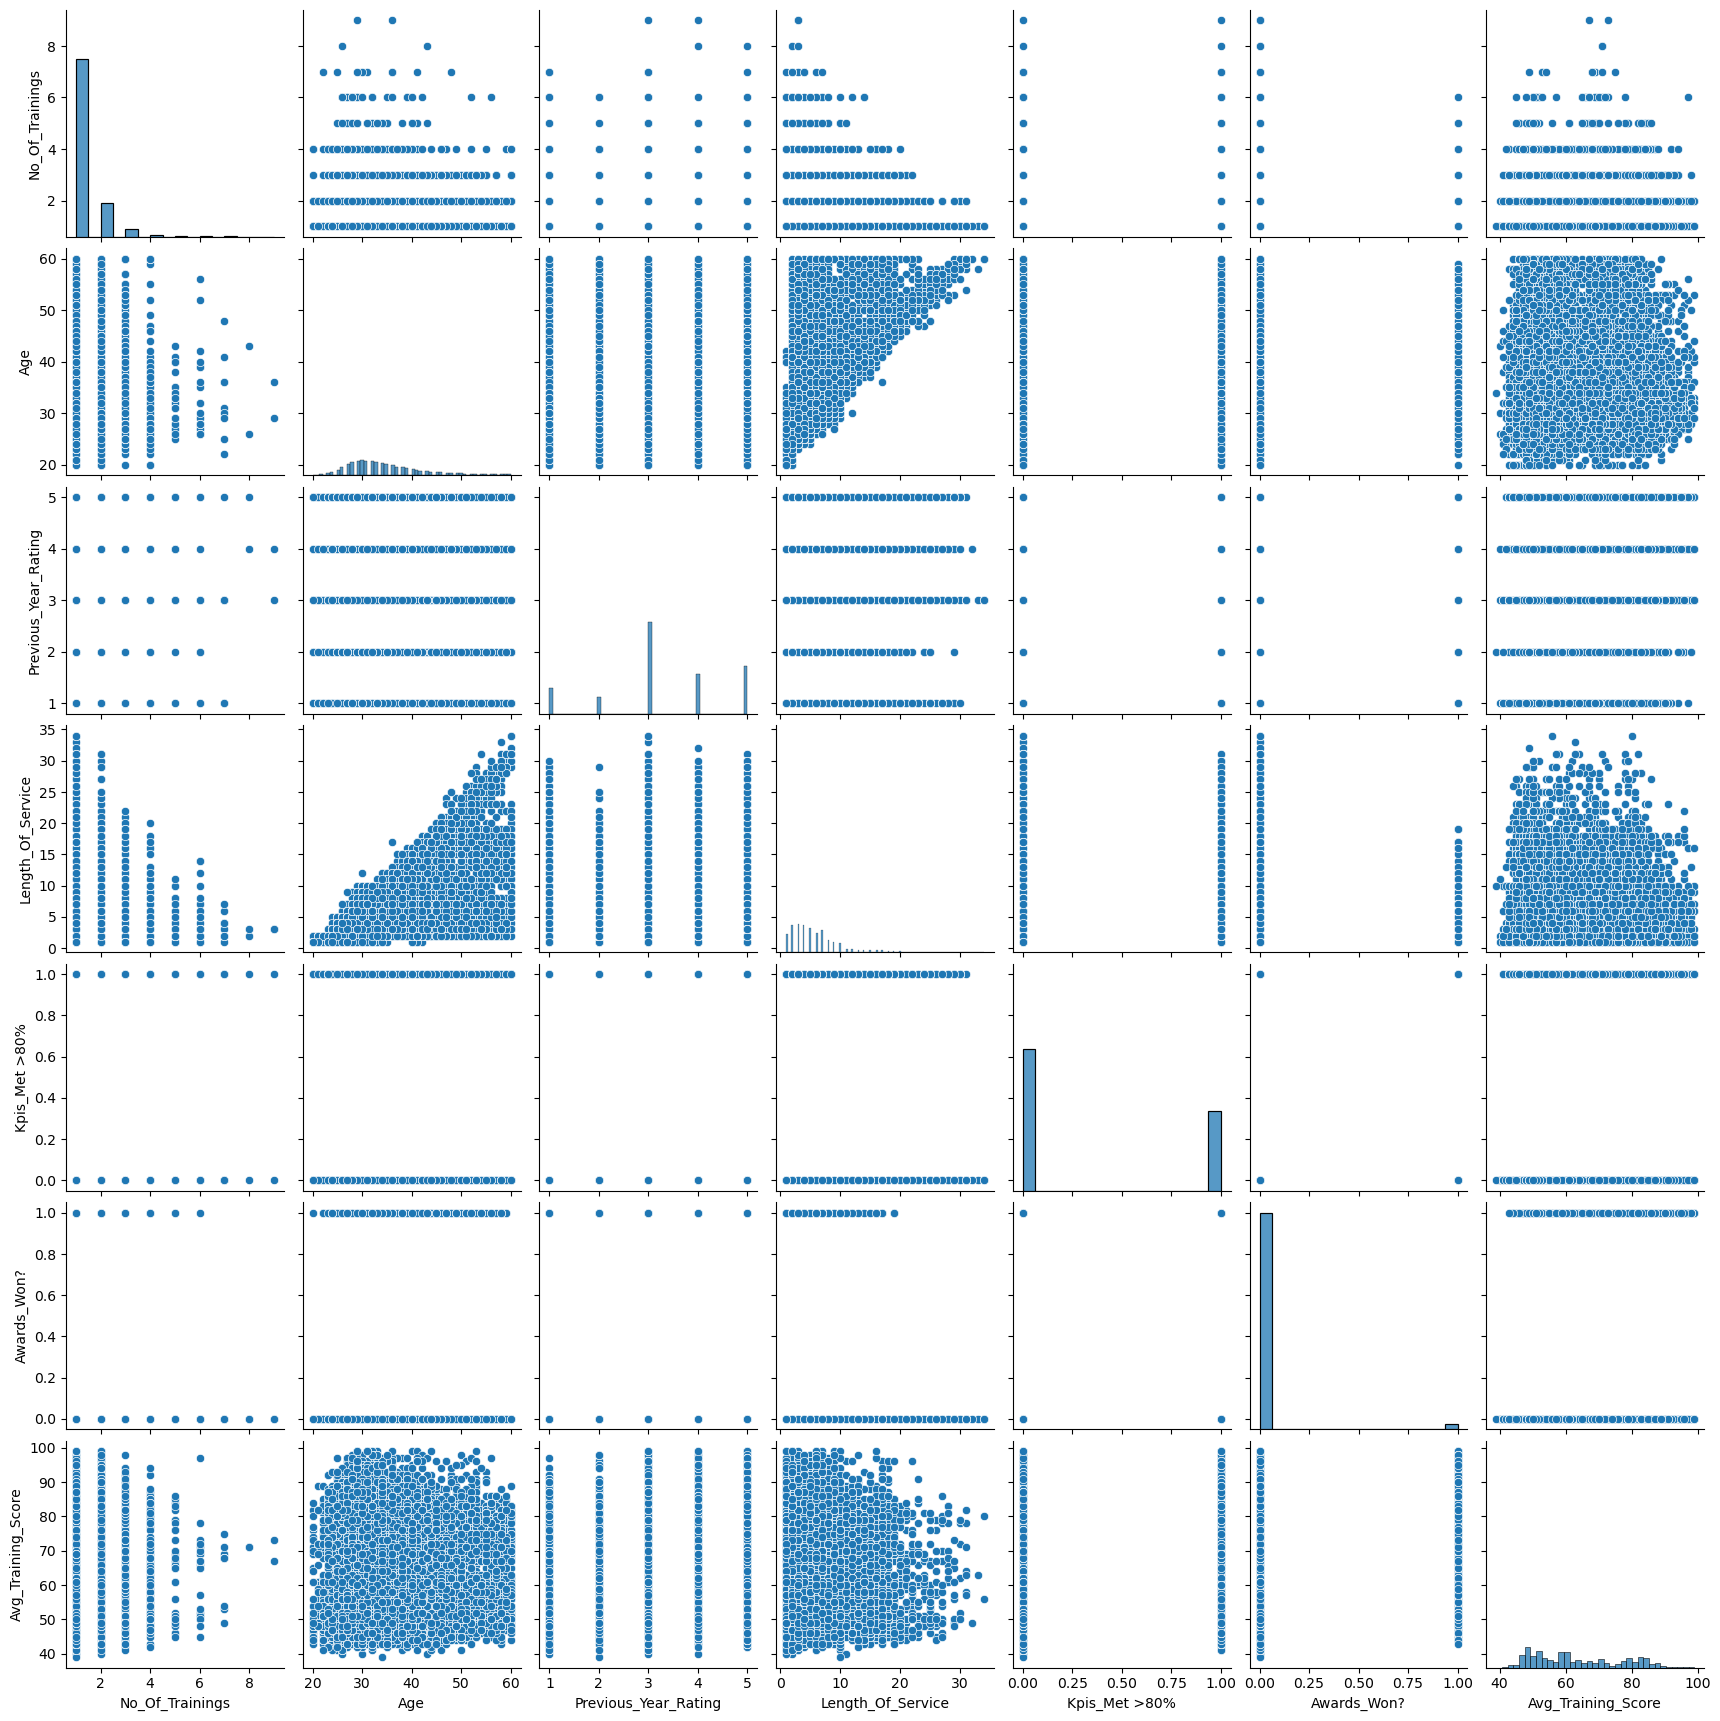

In [89]:
# pair plot of int columns 
sns.pairplot(data.select_dtypes(int));

## 🔍 Pairplot Insights from Employee Dataset

The pairplot displays pairwise relationships between the following features:
- `No_of_Trainings`
- `Age`
- `Previous_Year_Rating`
- `Length_of_Service`
- `KPIs_met >80%`
- `Awards_Won?`
- `Avg_Training_Score`

### Key Observations:

1. **Age vs Length of Service**
   - Strong positive correlation.
   - Older employees tend to have longer service durations.

2. **Previous Year Rating**
   - Appears discrete with values likely ranging between 1.0 to 5.0.
   - Some clustering visible around higher training scores.

3. **KPIs_met >80% and Awards_Won?**
   - Both are binary variables.
   - `Awards_Won?` tends to be correlated with `KPIs_met >80%`, indicating that performance drives recognition.

4. **Avg_Training_Score**
   - Shows good spread across all features.
   - Higher training scores appear linked to better KPI ratings and past performance.

5. **No_of_Trainings**
   - Most employees take fewer than 5 trainings.
   - A higher number of trainings doesn't necessarily indicate higher `Avg_Training_Score`.

6. **Outliers**
   - Certain features (e.g., `Length_of_Service`, `Age`) have visible outliers or skews in distribution.

### 📈 Summary:
- Age and service duration are tightly related.
- Good KPI performance and winning awards often go hand-in-hand.
- `Avg_Training_Score` is a strong continuous variable that varies significantly across categories and may be predictive.
- The dataset contains categorical and ordinal variables which are visualized as vertical lines or clusters in the scatter matrix.



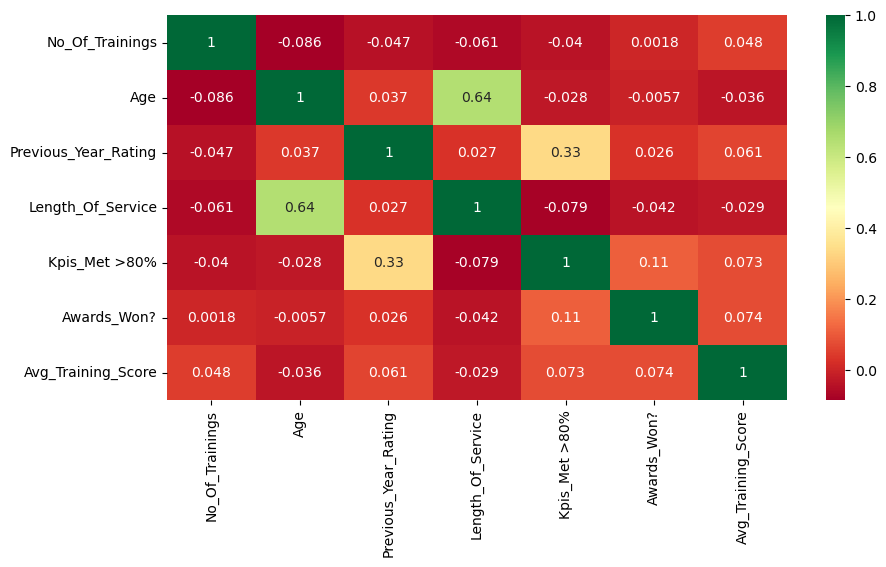

In [259]:
plt.figure(figsize=(10,5))
sns.heatmap(data.select_dtypes(int).corr(),annot=True,cmap='RdYlGn');

## 🔥 Correlation Heatmap Insights

This heatmap shows the Pearson correlation coefficients among key numerical and categorical features.

###  Key Takeaways:

1. **Length_Of_Service vs Age**
   - **Correlation: 0.64 (Strong Positive)**
   - Older employees generally have longer tenures.

2. **Previous_Year_Rating vs KPIs_Met >80%**
   - **Correlation: 0.33 (Moderate Positive)**
   - Employees who performed well in the past year tend to meet KPIs.

3. **Awards_Won? vs KPIs_Met >80%**
   - **Correlation: 0.11 (Weak Positive)**
   - Employees meeting KPIs are slightly more likely to win awards.

4. **Avg_Training_Score vs Awards_Won?**
   - **Correlation: 0.074 (Very Weak Positive)**
   - Training score shows a slight positive relationship with awards.

5. **Avg_Training_Score vs KPIs_Met >80%**
   - **Correlation: 0.073 (Very Weak Positive)**
   - High training scores may slightly improve chances of meeting KPIs.

6. **No_Of_Trainings**
   - Very low or negligible correlations with all variables.
   - Suggests training frequency doesn't strongly affect performance or ratings.

7. **Overall Observation**
   - No strong multicollinearity exists between most variables (|correlation| < 0.7).
   - Length of service and age is the only pair with high correlation, which may be redundant in modeling.

### 📊 Summary
- Most features are weakly correlated, indicating they may provide independent signals for prediction.
- The only strong relationship is between **Age** and **Length_Of_Service**, which should be considered during feature selection to avoid redundancy.


##  Summary

This project aimed to analyze employee performance data to identify patterns and factors that may influence training outcomes, promotions, or recognition. The following steps were carried out:

- **Data Exploration**: The dataset was explored using pairplots and correlation heatmaps.
- **Feature Relationships**:
  - `Age` and `Length_Of_Service` showed a strong positive correlation.
  - `Previous_Year_Rating` moderately correlates with `KPIs_Met >80%`, indicating that past performance is a good predictor of KPI success.
  - `Avg_Training_Score` had a weak but positive relationship with `KPIs` and `Awards_Won`, suggesting training contributes modestly to performance.
- **No Multicollinearity**: Most variables showed low correlation with each other, indicating no serious multicollinearity issues.
- **Binary Features**: Variables like `KPIs_Met >80%` and `Awards_Won?` provide useful classification signals despite low correlations.

---

## Conclusion

- **Key Influencers**: Employee **Age**, **Previous Year Rating**, and **KPIs Met** are more indicative of performance or recognition outcomes than just the number of trainings.
- **Model Readiness**: The features selected are largely independent, making them suitable for use in machine learning models like logistic regression or decision trees.
- **Business Insight**: Training programs, while valuable, must be paired with performance metrics and recognition to make a measurable impact. Identifying top performers based on KPIs and previous ratings may help in targeted promotions or awards.
- **Next Steps**: Build predictive models using the cleaned data and validated features. Evaluate performance using metrics like accuracy, precision, recall, and F1-score.

